# Aula 12 - Processamento de Linguagem Natural

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Revisão de Processamento de Textos
- 2) Exercícios Aula Anterior
- 3) Transformações dos Textos e Modelagem
- 4) Exercícios

<img src="https://i1.wp.com/thedatascientist.com/wp-content/uploads/2018/09/data_science_wordcloud.png?fit=1584%2C1008&ssl=1" width=800>

##   

## Revisão - Processamento de Textos

### Stopwords

Stopwords são palavras que aparecem com uma frequência muito alta nos textos, mas que não trazem um teor de conteúdo relevante para o nosso modelo. Vamos entender isso na prática:

In [1]:
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\ITX
[nltk_data]     Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ITX
[nltk_data]     Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Baixada a função de Stopwords, vamos definir um set de stopwords onde teremos uma lista com todas as stopwords em inglês já identificadas:

In [ ]:

nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')


In [2]:
stopwords = set(stopwords.words('english'))

In [3]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Vamos agora aplicar a remoção de Stopwords:

In [4]:
example = ["my", "house", "is", "black", "and", "white", "but", "isn't", "big"]

clean_list = []

for word in example:
    if word not in stopwords:
        clean_list.append(word)
        
print('A Lista original é: ', example)
print('A Lista sem stopwords é: ', clean_list)

A Lista original é:  ['my', 'house', 'is', 'black', 'and', 'white', 'but', "isn't", 'big']
A Lista sem stopwords é:  ['house', 'black', 'white', 'big']


##  

### Limpeza do Texto

Existem alguns cuidados com relação a grafia das palavras e elementos em um texto que devemos tomar bastante cuidado antes de fazer qualquer outra coisa. Esses pontos são:<br><br>
- Transformar todas as palavras para MAIÚSCULAS ou minúsculas;
- Remover caracteres especiais;
- Remover dígitos (quando não forem relevantes);
- Remover acentuação (caso típico de quando trabalhamos com textos em Português);

### Converter entre MAIÚSCULA e minúscula

In [5]:
string = 'OtoRriNoLaRINgOLoGIsTa'

string_upper = string.upper()
string_lower = string.lower()

print('Palavra Original: ', string)
print('Palavra Maiúscula: ', string_upper)
print('Palavra Minúscula: ', string_lower)

Palavra Original:  OtoRriNoLaRINgOLoGIsTa
Palavra Maiúscula:  OTORRINOLARINGOLOGISTA
Palavra Minúscula:  otorrinolaringologista


##  

### Remoção de dígitos, caracteres especiais e qualquer outro item que não queremos no texto

Para essa etapa do processo, iremos utilizar uma biblioteca auxiliar [RegEx (Regular Expression)](https://docs.python.org/3/library/re.html):

In [6]:
import re

Importada a biblioteca, vamos utilizar a função *re.sub*, para substituir os elementos que não queremos nos nossos textos:

In [7]:
string = 'Siga nas redes sociais o @letscode, ja somos mais de 1 milhao de #hashtags e 200 mil followers'
print('Texto Original: ', string)

# Remove Numbers
string = re.sub(r'\d', '', string)
print('Texto sem os números: ', string)

###
# Remove Special Characters
string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
print('Texto sem os caracteres especiais: ', string)

Texto Original:  Siga nas redes sociais o @letscode, ja somos mais de 1 milhao de #hashtags e 200 mil followers
Texto sem os números:  Siga nas redes sociais o @letscode, ja somos mais de  milhao de #hashtags e  mil followers
Texto sem os caracteres especiais:  Siga nas redes sociais o letscode ja somos mais de milhao de hashtags e mil followers


Utilizem a documentação para descobrir mais códigos para filtrar elementos ou mesmo deem uma olhada nesse artigo, que resume de uma forma bem visual as aplicações do RegEx: [clique aqui](https://amitness.com/regex/)

##  

### Remoção de Acentuação

Para a remoção de acentuação, iremos utilizar uma bibloteca chamada *Unidecode*:

In [8]:
# Caso precise instalar a biblioteca, descomente o código abaixo
#!pip install unidecode

In [9]:
from unidecode import unidecode

In [10]:
string = 'João Sebastião Alvará Vovô Linguiça Expressão'
print(string)

string = unidecode(string)
print(string)

João Sebastião Alvará Vovô Linguiça Expressão
Joao Sebastiao Alvara Vovo Linguica Expressao


##  

## Tokenização

Tokenização é um processo onde transformamos um texto de uma strin única em fragmentos desse texto na forma de *tokens*, que nada mais são do que as próprias palavras! Para isso, vamos utilizar a função *word_tokenize* do NLTK:

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
string = 'O rato roeu a roupa do rei de Roma'

words = word_tokenize(string)

print('A frase orginal é: ', string)
print('Os tokens são: ', words)

A frase orginal é:  O rato roeu a roupa do rei de Roma
Os tokens são:  ['O', 'rato', 'roeu', 'a', 'roupa', 'do', 'rei', 'de', 'Roma']


##  

## Normalização de Textos

## Stemming

In [13]:
from nltk.stem.porter import *

In [14]:
stemmer = PorterStemmer()

In [15]:
words = ['saying', 'writing', 'running', 'ate', 'worked']

stem_words = []
for w in words:
    s_words = stemmer.stem(w)
    stem_words.append(s_words)
    
stem_words

['say', 'write', 'run', 'ate', 'work']

##  

## Lemmatization

In [16]:
# import these modules 
from nltk.stem import WordNetLemmatizer 

# na primeira vez, é necessário baixar o wordnet
# após a primeira vez, pode comentar a linha abaixo
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\ITX
[nltk_data]     Gamer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 

# argumento "pos" indica a qual classe gramatical o token pertence
print("running :", lemmatizer.lemmatize("running", pos = "v")) 
print("went :", lemmatizer.lemmatize("went", pos = 'v'))

rocks : rock
corpora : corpus
running : run
went : go


##   

## Pipeline de Processamento de Textos

In [19]:
# Pipeline - Text Preprocessing
def preprocessing(string):
    ###
    # Remove Numbers
    string = re.sub(r'\d', '', string)
    ###
    # Remove Special Characters
    string = re.sub(r"[^a-zA-Z0-9]+", ' ', string)
    ###
    # Lowercase words
    string = string.lower()
    ###
    # Word Tokenize
    words = word_tokenize(string)
    ###
    # Remove Stopwords
    filtered_words = []
    for w in words:
        if w not in stopwords:
            filtered_words.append(w)
    ###
    # Stemming Words
    stem_words = []
    for w in filtered_words:
        s_words = stemmer.stem(w)
        stem_words.append(s_words)
    ###
    return stem_words

Vamos agora já começar a práticar com os nossos dados de exemplo:

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
movies = pd.read_csv('./datasets/movies.csv', index_col=0)

Nosso exemplo será uma Análise de Sentimento em Críticas de Filmes, onde vamos identificar se a crítica foi boa ou não:

In [22]:
movies.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    50000 non-null  object
 1   label   50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [24]:
movies['label'].value_counts()

0    25000
1    25000
Name: label, dtype: int64

A nossa base de dados tem 50 mil linhas e levando em consideração que as críticas são sobre filmes diversos, a quantidade de palavras disponíveis nos textos será muito grande. Para economizar tempo de aula com processamneto dos textos e modelagem, iremos criar uma amostra com 10% da base:

In [25]:
movies_sample = movies.sample(frac=0.1, replace=False)

In [26]:
movies.shape

(50000, 2)

In [27]:
movies_sample.shape

(5000, 2)

Agora iremos aplicar o nosso processamento dos textos:

In [28]:
movies_sample["filtered_words"] = movies_sample['text'].apply(lambda x: preprocessing(x))

# Normalmente depois do processamento juntamos as palavras novamente em uma só string

movies_sample['join_words'] = movies_sample['filtered_words'].apply(lambda x: ' '.join(x))

In [29]:
movies_sample.head()

,text,label,filtered_words,join_words
598,I first saw this movie with my fiancée many ye...,1,"[first, saw, movi, fianc, e, mani, year, came,...",first saw movi fianc e mani year came thought ...
14610,"Three zany couples, all SIX OF A KIND, become ...",1,"[three, zani, coupl, six, kind, becom, entangl...",three zani coupl six kind becom entangl madcap...
4698,"Being a fan of cheesy horror movies, I saw thi...",0,"[fan, cheesi, horror, movi, saw, video, shop, ...",fan cheesi horror movi saw video shop thought ...
3490,"For most younger viewers out there, they proba...",0,"[younger, viewer, probabl, idea, buster, keato...",younger viewer probabl idea buster keaton prob...
8533,"To qualify my use of ""realistic"" in the summar...",1,"[qualifi, use, realist, summari, mani, old, fo...",qualifi use realist summari mani old folk know...


##   

## Exercícios da última aula

Desenvolvimento dos exercícios em um notebook a parte.

## 

## Corpus

É importante ressaltar que a escolha das etapas de pré-processamento não é algo óbvio, dado que há muitas escolhas possíveis acerca do que se fazer para pré-processar os dados. Assim, o indicado é treinar diferentes modelos testando diferentes combinações das técnicas de pré-processamento, até que o melhor procedimento seja encontrado!

**Nomenclatura**: o conjunto de mensagens pré-processadas é chamado de **Corpus**.

## Vocabulário

O vocabulário do corpus nada mais é do que uma listagem das palavras individuais que aparecem no corpus. Para encontrar o vocabulário, basta contarmos a aparição de cada palavra isolada no corpus. Ao fim, teremos N palavras únicas que compõem nosso vocabulário.

##  

## Bag of Words

**Bag of Words** é o processo onde traduzimos o texto já tratado para uma representação numérica que faça sentido para o modelo de *Machine Learning* consiga interpretá-lo.

As transformações mais comuns em NLP são **CountVectorizer** e **TF-IDF**

##  

## CountVectorizer 

Após estudarmos o vocabulário, vamos efetivamente montar o modelo de bag-of-words. Este modelo funciona da seguinte forma:

- Pegue uma frase do corpus;
- Crie um vetor N-dimensional de inteiros (onde N é o número de palavras do vocabulário);
- Cada componente do vetor corresponde a uma palavra do vocabulário, segundo a ordem que as palavras aparecem no vocabulário.
- Preencha esse vetor com zeros (todas suas componentes serão 0);
- Para cada palavra da frase, mude a componente correspondente do vetor para 1;
- Faça isso para todas as frases do corpus;

Ao fim do processo acima para todas as frases do corpus (supomos que sejam M frases), nós empilhamos os respectivos vetores, de modo que teremos uma matriz de M linhas e N colunas. E essa matriz é o modelo final de bag-of-words, que por ser uma matriz numérica, pode ser facilmente usada como input pros modelos de machine learning!

Pra exemplificar o procedimento, vamos a um exemplo: suponha que nossa base de treino contenha as seguintes 3 frases **(M = 3)**:

["Yay can't wait to party together!",<br>
 'You got called a tool?',<br>
 'Still chance there. If you search hard you will get it..let have a try :)']

Após o pre-processamento inicial das frases, o corpus final fica sendo:

['yay cant wait party together',<br>
 'get call tool',<br>
 'still chance search hard get itlet try']

Olhando pro corpus, é fácil ver que nosso vocabulário é:

['wait',
 'itlet',
 'get',
 'still',
 'search',
 'call',
 'yay',
 'cant',
 'together',
 'tool',
 'hard',
 'try',
 'chance',
 'party']

É útil deixarmos o vocabulário em ordem alfabética:

['call',
 'cant',
 'chance',
 'get',
 'hard',
 'itlet',
 'party',
 'search',
 'still',
 'together',
 'tool',
 'try',
 'wait',
 'yay']
 
Temos **N = 14** palavras no vocabulário. 

O one-hot encoding de cada uma das frases do corpus irá, então, produzir um **vetor 14-dimensional** de 1 e 0, com 1 nas posições respectivas às palavras no vocabulário. Vamos entender:

Para a frase "yay cant wait party together", teremos um vetor com o numero 1 nas posições 13, 1, 12, 6, e 9 (respectivamente as posições de "yay", "cant", "wait", "party" e "together"), de forma que temos o vetor:

> "yay cant wait party together"" --> [0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

Analogamente, para as outras duas frases, teremos os vetores:

> "get call tool" --> [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

> "still chance search hard get itlet try" --> [0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]


Finalmente, o modelo de bag-of-words (BoW) final é a **matriz de dimensão 3 x 14 (M = 3 frases no corpus, N = 14 palavras no vocabulário)**, obtida ao empilhar os vetores:
  
$ BoW = \begin{pmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 1 & 1 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 0
\end{pmatrix} $

Esse é o processo conhecido por [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

Naturalmente, tanto nosso corpus quanto nosso vocabulário serão muito maiores que os desse exemplo simples. Mas, o procedimento é exatamente o mesmo, e no final, teremos exatamente o mesmo output do modelo de bag-of-words: uma matriz M x N de 0 e 1, prontinha pra ser input dos modelos de machine learning!

Vamos definir primeiro X e y:

In [30]:
X = movies_sample['join_words']
y = movies_sample['label']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                     y, 
                                                     test_size = 0.3, 
                                                     random_state = 42)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer()

In [34]:
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()

In [35]:
X_train_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Vamos fazer uma função para testar diversos tipos de modelos:

In [36]:
random_seed = 42

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

list_models = [
{'model_name': 'Logistic Regression',
 'estimator' : LogisticRegression(random_state = random_seed, 
                                  solver = 'lbfgs')},
{'model_name': 'Decision Tree',
 'estimator' : DecisionTreeClassifier(random_state = random_seed)},
{'model_name': 'Random Forest',
 'estimator' : RandomForestClassifier(random_state = random_seed)}, 
{'model_name': 'AdaBoost',
 'estimator' : AdaBoostClassifier(random_state = random_seed)}
]

In [39]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def test_models_plot_roc_auc_curve(model_list, col_model_name, col_model, X_train, X_test, y_train, y_test):
    for mdl in model_list:
        model = mdl[col_model]
        model.fit(X_train, y_train)
        y_predict = model.predict(X_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
        auc = metrics.roc_auc_score(y_test, model.predict(X_test))
        plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (mdl[col_model_name], auc))
        print("Model      : %s" % mdl[col_model_name])
        print("Accuracy   : %0.4f " %  accuracy_score(y_test, y_predict))
        print("Precision  : %0.4f " % precision_score(y_test, y_predict, average='weighted'))
        print("Recall     : %0.4f " % recall_score(y_test, y_predict, average='weighted'))
        print("F1 - Score : %0.4f " % f1_score(y_test, y_predict, average='weighted'))
        print("ROC - AUC  : %0.4f " % auc)
        print("======================")
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-AUC curve')
    plt.legend(loc="lower right")
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model      : Logistic Regression
Accuracy   : 0.8360 
Precision  : 0.8362 
Recall     : 0.8360 
F1 - Score : 0.8359 
ROC - AUC  : 0.8353 
Model      : Decision Tree
Accuracy   : 0.6980 
Precision  : 0.6982 
Recall     : 0.6980 
F1 - Score : 0.6974 
ROC - AUC  : 0.6966 
Model      : Random Forest
Accuracy   : 0.8453 
Precision  : 0.8453 
Recall     : 0.8453 
F1 - Score : 0.8453 
ROC - AUC  : 0.8449 
Model      : AdaBoost
Accuracy   : 0.7993 
Precision  : 0.7993 
Recall     : 0.7993 
F1 - Score : 0.7993 
ROC - AUC  : 0.7991 


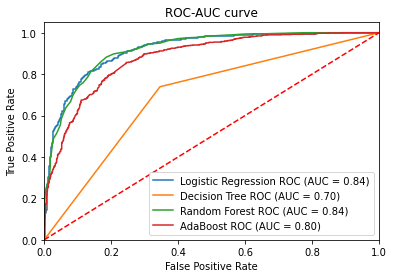

In [40]:
test_models_plot_roc_auc_curve(list_models,
                               "model_name",
                               "estimator",
                               X_train_cv,
                               X_test_cv,
                               y_train,
                               y_test)

##  

## TF-IDF

**Term Frequency and Inverse Document Frequency** é uma tranformação muito conhecida, onde avaliamos a relevância das palavras pelo **Frequência dos Termos** multiplicado pelo **Inverso da Frequência nos Documentos**, onde **documento** é cada um dos textos dentro de um Dataset. Vamos entender cada um dos termos:

> **TF - Term Frequency**: é a frequência de vezes que um termo/palavra aparece em cada um dos documentos analisados (isso nos ajuda a avaliar a relevância daquela palavra);

> **IDF - Inverse Document Frequency**: aqui avaliamos em quantos documentos o termo/palavra aparece (dessa forma conseguimos entender a sua influência em identificar os textos);

O TF acredito que seja bem claro o entendimento, mas o IDF pode ser um pouco confuso, então vamos explicar da seguinte forma:
<br><br>
Imagina que temos diversos textos (documents) sobre esportes e queremos classificar os textos de acordo com os esportes tratados (futebol, basquete e etc). Se uma palavra aparecer em todos os textos qual a relevância dela na identificação do texto? Mínima (Por exemplo a palavra esporte em textos que só falam sobre esporte).
<br><br>
Por outro lado, se a palavra esgrima aparece em apenas um dos documentos (ou poucos deles), ela vai ser importante para a identificação daquele texto!
<br><br>
Resumindo o conceito de TF-IDF em diagrama, temos que:

<img src="https://www.researchgate.net/profile/Haider-Al-Khateeb/publication/291950178/figure/fig1/AS:330186932408324@1455734107458/Term-Frequency-Inverse-Document-Frequency-TF-IDF.png" width=800>

Vamos aplicá-lo na prática:

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(use_idf = True)

In [42]:
X_train_tfidf = tfidf.fit_transform(X_train).todense()
X_test_tfidf  = tfidf.transform(X_test).todense()

In [43]:
X_train_tfidf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

Model      : Logistic Regression
Accuracy   : 0.8560 
Precision  : 0.8567 
Recall     : 0.8560 
F1 - Score : 0.8558 
ROC - AUC  : 0.8550 
Model      : Decision Tree
Accuracy   : 0.6860 
Precision  : 0.6859 
Recall     : 0.6860 
F1 - Score : 0.6860 
ROC - AUC  : 0.6856 
Model      : Random Forest
Accuracy   : 0.8253 
Precision  : 0.8257 
Recall     : 0.8253 
F1 - Score : 0.8254 
ROC - AUC  : 0.8255 
Model      : AdaBoost
Accuracy   : 0.7967 
Precision  : 0.7972 
Recall     : 0.7967 
F1 - Score : 0.7963 
ROC - AUC  : 0.7956 


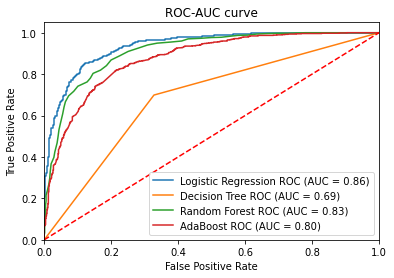

In [44]:
test_models_plot_roc_auc_curve(list_models,
                               "model_name",
                               "estimator",
                               X_train_tfidf,
                               X_test_tfidf,
                               y_train,
                               y_test)

##  

## Exercícios

**1)** Utilizando os dados de tweets vamos avaliar com modelos de Machine Learning se os tweets são de desastres ou não. Essa base é um dataset conhecido do Kaggle, onde vocês podem ter mais detalhes [clicando aqui](https://www.kaggle.com/c/nlp-getting-started/overview).